<a href="https://colab.research.google.com/github/amelliaaas/TugasTKC_282-305/blob/main/Replika_Jurnal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.152
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13302916 kB
MemFree:         9013776 kB
MemAvailable:   11972016 kB
Buffers:           78704 kB
Cached:          2505540 kB
SwapCached:            0 kB
Active:          2238344 kB
Inactive:        1826780 kB
Active(anon):     917136 kB
Inactive(anon):     6288 kB
Active(file):    1321208 kB
Inactive(file):  1820492 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               168 kB
Writeback:             0 kB
AnonPages:       1480908 kB
Mapped:          1072748 kB
Shmem:              7040 kB
KReclaimable:     116236 kB
Slab:             159456 kB
SReclaimable:     116236 kB
SUnreclaim:        43220 kB
KernelStack:        5808 kB
PageTables:        11704 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651456 kB
Committed_AS:    5107724 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8344 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

plt.style.use('ggplot')

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import random 
import shutil
from skimage import io, transform
import math
import torch
import pandas as pd
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchvision.utils import make_grid
import helper
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

print("using Pytorch version", torch.__version__)

using Pytorch version 1.10.0+cu111


In [ ]:
ls

model_2.pt  test/  train/


In [ ]:
imagePathsTrain = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/train"))
trainX = []
trainY = []

for imagePath in imagePathsTrain:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	trainX.append(image)
	trainY.append(label)

trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)

lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
trainY = to_categorical(trainY)

In [ ]:
imagePathsTest = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.15, random_state=42, stratify=trainY)

In [ ]:
print("SHAPE OF TRAIN FEATURES: "+str(trainX.shape))
print("SHAPE OF TRAIN LABELS: "+str(trainY.shape))
print("SHAPE OF VALIDATION FEATURES: "+str(valX.shape))
print("SHAPE OF VALIDATION LABELS: "+str(valY.shape))
print("SHAPE OF TEST FEATURES: "+str(testX.shape))
print("SHAPE OF TEST LABELS: "+str(testY.shape))

SHAPE OF TRAIN FEATURES: (213, 224, 224, 3)
SHAPE OF TRAIN LABELS: (213, 3)
SHAPE OF VALIDATION FEATURES: (38, 224, 224, 3)
SHAPE OF VALIDATION LABELS: (38, 3)
SHAPE OF TEST FEATURES: (66, 224, 224, 3)
SHAPE OF TEST LABELS: (66, 3)


In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = True

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
HR = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(valX, valY),
	validation_steps=len(valX) // BS,
	epochs=EPOCHS)

Epoch 1/20
6/6 [==============================] - 130s 20s/step - loss: 1.1794 - accuracy: 0.3702 - val_loss: 0.9945 - val_accuracy: 0.4474
Epoch 2/20
6/6 [==============================] - 117s 19s/step - loss: 0.7796 - accuracy: 0.6740 - val_loss: 0.9531 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 116s 19s/step - loss: 0.5762 - accuracy: 0.7624 - val_loss: 0.8942 - val_accuracy: 0.5789
Epoch 4/20
6/6 [==============================] - 116s 19s/step - loss: 0.3466 - accuracy: 0.9116 - val_loss: 0.6783 - val_accuracy: 0.6842
Epoch 5/20
6/6 [==============================] - 117s 20s/step - loss: 0.2881 - accuracy: 0.9116 - val_loss: 0.6229 - val_accuracy: 0.7632
Epoch 6/20
6/6 [==============================] - 123s 20s/step - loss: 0.2503 - accuracy: 0.9448 - val_loss: 0.6556 - val_accuracy: 0.7632
Epoch 7/20
6/6 [==============================] - 117s 19s/step - loss: 0.1777 - accuracy: 0.9613 - val_loss: 0.8037 - val_accuracy: 0.7105
Epoch 8/20
6/6 [====

**Preparing Train and Test data**

In [ ]:
class_names = ['Normal', 'Viral Pneumonia', 'Covid']
data_dir = '/content/drive/MyDrive/Covid19-dataset'

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_ds = ImageFolder(data_dir+'/train', train_transform)
test_ds = ImageFolder(data_dir+'/test', test_transform)
classes = train_ds.classes

In [ ]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 251
Counts: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}


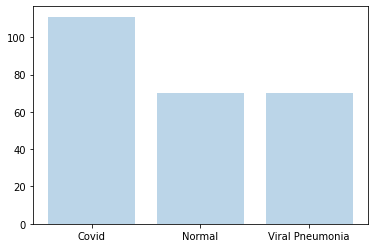

In [ ]:
def describe_dataset(data):
    classes_count = { c:0 for c in classes}
    for _,label in data:
        classes_count[classes[label]]+=1

    print(f'Classes: {len(classes)} - {classes} ')
    print(f'Examples: {len(data)}')
    print(f'Counts: {classes_count}')
    plt.bar(classes_count.keys(),classes_count.values(), alpha=0.3 )

    return classes_count

_ = describe_dataset(train_ds)


TRAIN DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 221
Counts: {'Covid': 97, 'Normal': 65, 'Viral Pneumonia': 59}

VALIDATION DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 30
Counts: {'Covid': 14, 'Normal': 5, 'Viral Pneumonia': 11}

TEST DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 66
Counts: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


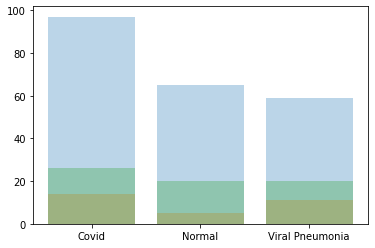

In [ ]:
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed);

val_size = 30
train_size = len(train_ds) - val_size

train_ds, val_ds = random_split(train_ds, [train_size, val_size])

print("\nTRAIN DATASET")
_=describe_dataset(train_ds)

print("\nVALIDATION DATASET")
_=describe_dataset(val_ds)

print("\nTEST DATASET")
_=describe_dataset(test_ds)

dataset = None
new_dataset = None

In [ ]:
batch_size = 5

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(train_loader))
print('Number of validation batches', len(valid_loader))
print('Number of test batches', len(test_loader))

Number of training batches 45
Number of validation batches 6
Number of test batches 14


**Data Visualization**

In [ ]:
def show_images(images, labels, preds):
    plt.figure(figsize=(8, 4))
    for i, image in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'green'
        if preds[i] != labels[i]:
            col = 'red'
            
        plt.xlabel(f'{classes[int(labels[i].numpy())]}')
        plt.ylabel(f'{classes[int(preds[i].numpy())]}', color=col)
        if(i==5):
            break
    plt.tight_layout()
    plt.show()

In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
images.shape

torch.Size([5, 3, 224, 224])

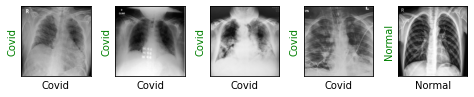

In [ ]:
show_images(images, labels, labels) #passing the predicitons as the labels

In [ ]:
print(train_ds[0][0].shape)
train_ds[0]

torch.Size([3, 224, 224])


(tensor([[[-1.8268, -1.8097, -1.8097,  ..., -1.7069, -1.6898, -1.7069],
          [-1.8439, -1.8268, -1.8268,  ..., -1.6898, -1.6898, -1.7240],
          [-1.8439, -1.8439, -1.8268,  ..., -1.6898, -1.6898, -1.7069],
          ...,
          [-1.7583, -1.7240, -1.7240,  ..., -1.8782, -1.8610, -1.8610],
          [-1.7754, -1.7240, -1.7240,  ..., -1.8610, -1.8782, -1.8782],
          [-1.7412, -1.7240, -1.7240,  ..., -1.8610, -1.8782, -1.8782]],
 
         [[-1.7381, -1.7206, -1.7206,  ..., -1.6155, -1.5980, -1.6155],
          [-1.7556, -1.7381, -1.7381,  ..., -1.5980, -1.5980, -1.6331],
          [-1.7556, -1.7556, -1.7381,  ..., -1.5980, -1.5980, -1.6155],
          ...,
          [-1.6681, -1.6331, -1.6331,  ..., -1.7906, -1.7731, -1.7731],
          [-1.6856, -1.6331, -1.6331,  ..., -1.7731, -1.7906, -1.7906],
          [-1.6506, -1.6331, -1.6331,  ..., -1.7731, -1.7906, -1.7906]],
 
         [[-1.5081, -1.4907, -1.4907,  ..., -1.3861, -1.3687, -1.3861],
          [-1.5256, -1.5081,

In [ ]:
def show_example(img, label):
    print('Label: ', classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Normal (1)


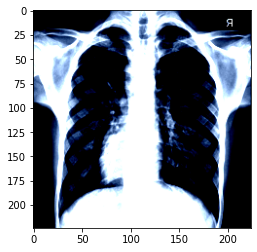

In [ ]:
show_example(*train_ds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Viral Pneumonia (2)


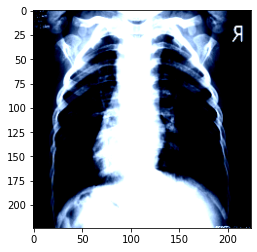

In [ ]:
show_example(*train_ds[90])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


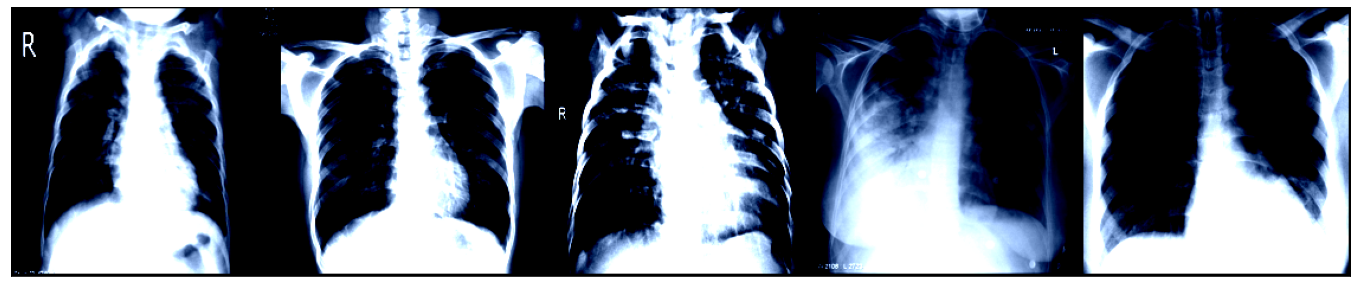

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(24, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

show_batch(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


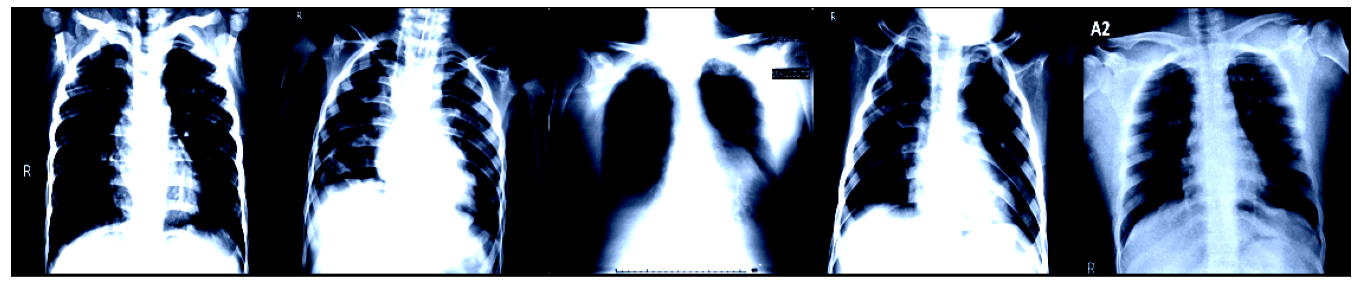

In [ ]:
show_batch(test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


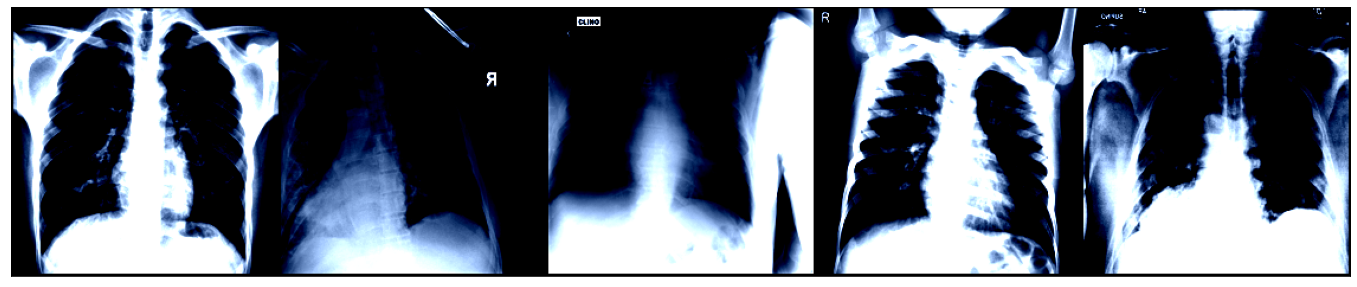

In [ ]:
show_batch(valid_loader)

**VGG 19**

In [ ]:
def change_device(input):
    if torch.cuda.is_available():
        return input.cuda()
    else:
        return input

In [ ]:
def train(model, train_loader):
    
    model.train()
    
    epoch_loss = 0

    for train_step, (images, labels) in enumerate(train_loader):

        x_train = change_device(images)
        y_train = change_device(labels)

        optimizer.zero_grad()
        
        y_pred = model(x_train)
        
        loss = loss_fn(y_pred,y_train)
        
        loss.backward()
        
        optimizer.step()

        if(train_step%20==0):
            print(f"batch:   {train_step}   train_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
        epoch_loss += loss.item()
        
    return epoch_loss / (train_step +1 )

In [ ]:
def evaluate(model, loader):
    
    model.eval()
    print("validation/test set evaluation")
    epoch_loss = 0
    
    with torch.no_grad():
        accuracy = 0
        for val_step, (images, labels) in enumerate(loader):
            x_train = change_device(images)
            y_train = change_device(labels)

            y_pred = model(x_train)

            loss = loss_fn(y_pred,y_train)

            _, preds = torch.max(y_pred, 1)
            accuracy += sum(( preds.cpu() == labels).numpy())

            if(val_step%3==0):
                print(f"batch:   {val_step}   validation_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
            epoch_loss += loss.item()
        accuracy = accuracy/len(val_ds)
        print(f' Accuracy: {accuracy:.4f}')

    return epoch_loss / (val_step + 1)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def show_preds(model,loader):
    model.eval() 
    print("test set evaluation")

    with torch.no_grad():
        accuracy = 0
        for test_step, (images, labels) in enumerate(loader):
            x_train = change_device(images)
            y_train = change_device(labels)

            y_pred = model(x_train)

            loss = loss_fn(y_pred,y_train)

            _, preds = torch.max(y_pred, 1)
          
            accuracy += sum(( preds.cpu() == labels).numpy())
        accuracy = accuracy/len(test_ds)
        print(f' Accuracy: {accuracy:.4f}')

    show_images(images, labels, preds.cpu())

In [ ]:
class VGGNet(nn.Module):
    def __init__ (self):
        super(VGGNet,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,padding=1,stride=1) #224
        self.maxPool1 = nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1,stride=1) #112
        self.maxPool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1,stride=1) #56
        self.maxPool3 = nn.MaxPool2d(2,2)

        self.conv4 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,padding=1,stride=1) #28
        self.maxPool4 = nn.MaxPool2d(2,2)

        self.conv5 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=1,padding=0,stride=1)
        self.maxPool5 = nn.MaxPool2d(2,2)

        self.conv6 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1,stride=1) #14
        self.maxPool6 = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(4608,1024) #7
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,3)

    def forward(self , x):
               
        x = self.maxPool1(F.relu(self.conv1(x)))

        x = self.maxPool2(F.relu(self.conv2(x)))

        x = self.maxPool3(F.relu(self.conv3(x)))

        x = self.maxPool4(F.relu(self.conv4(x)))

        x = self.maxPool5(F.relu(self.conv5(x)))

        x = self.maxPool6(F.relu(self.conv6(x)))

        x = x.reshape(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

In [ ]:
model = change_device(VGGNet())

In [ ]:
model

VGGNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
  (maxPool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f

In [ ]:
for param in model.parameters():
    print(f' {param.size()} parameters are {param.numel()}')

 torch.Size([64, 3, 3, 3]) parameters are 1728
 torch.Size([64]) parameters are 64
 torch.Size([128, 64, 3, 3]) parameters are 73728
 torch.Size([128]) parameters are 128
 torch.Size([256, 128, 3, 3]) parameters are 294912
 torch.Size([256]) parameters are 256
 torch.Size([512, 256, 3, 3]) parameters are 1179648
 torch.Size([512]) parameters are 512
 torch.Size([512, 512, 1, 1]) parameters are 262144
 torch.Size([512]) parameters are 512
 torch.Size([512, 512, 3, 3]) parameters are 2359296
 torch.Size([512]) parameters are 512
 torch.Size([1024, 4608]) parameters are 4718592
 torch.Size([1024]) parameters are 1024
 torch.Size([512, 1024]) parameters are 524288
 torch.Size([512]) parameters are 512
 torch.Size([3, 512]) parameters are 1536
 torch.Size([3]) parameters are 3


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters and total memory usage is {count_parameters(model)*(4/(2**20)*3)} mb')

The model has 9,419,395 trainable parameters and total memory usage is 107.79642105102539 mb


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [ ]:
N_EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_loader)
    valid_loss = evaluate(model, valid_loader)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        print("saving the model")
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_2.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

batch:   0   train_loss   1.093477487564087   perplexity   = 2.9846351146698
batch:   20   train_loss   1.105398178100586   perplexity   = 3.0204269886016846
batch:   40   train_loss   1.1269505023956299   perplexity   = 3.086230754852295
validation/test set evaluation
batch:   0   validation_loss   1.125685691833496   perplexity   = 3.082329750061035
batch:   3   validation_loss   1.0782434940338135   perplexity   = 2.939511775970459
 Accuracy: 0.4667
saving the model
Epoch: 01 | Time: 1m 37s
	Train Loss: 1.084 | Train PPL:   2.958
	 Val. Loss: 1.045 |  Val. PPL:   2.843


test set evaluation
 Accuracy: 0.3939


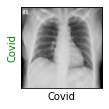

In [ ]:
show_preds(model, test_loader) #learning rate 3e-5

**2**